
==== Running config: n=1200, p=0.008 ====
Estimated average degree: 9.5992 vs. theory ~ p*(n-1) = 9.5920
Estimated clustering:     0.0080 vs. theory ~ p = 0.008
Estimated avg path len:   3.3910 (giant comp) vs. theory ~ log(n)/log(p*n): 3.1348


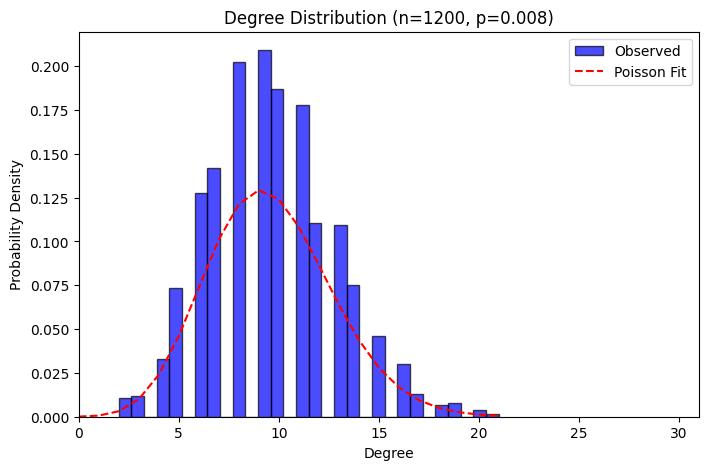


==== Running config: n=2500, p=0.004 ====
Estimated average degree: 10.0012 vs. theory ~ p*(n-1) = 9.9960
Estimated clustering:     0.0041 vs. theory ~ p = 0.004
Estimated avg path len:   3.6531 (giant comp) vs. theory ~ log(n)/log(p*n): 3.3979


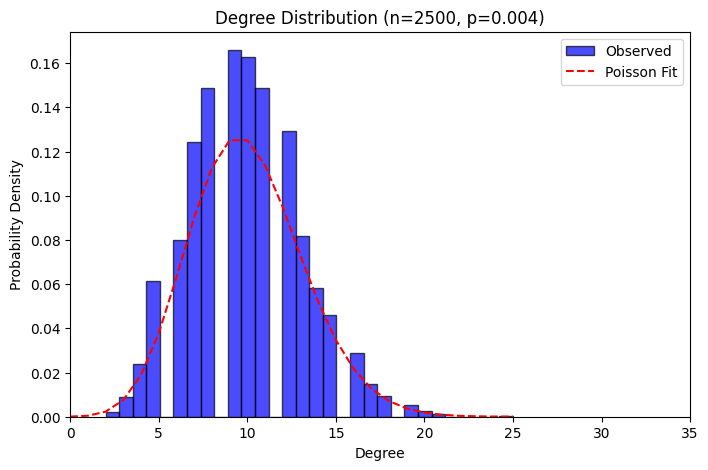


==== Running config: n=4000, p=0.0025 ====
Estimated average degree: 9.9960 vs. theory ~ p*(n-1) = 9.9975
Estimated clustering:     0.0025 vs. theory ~ p = 0.0025
Estimated avg path len:   3.8519 (giant comp) vs. theory ~ log(n)/log(p*n): 3.6021


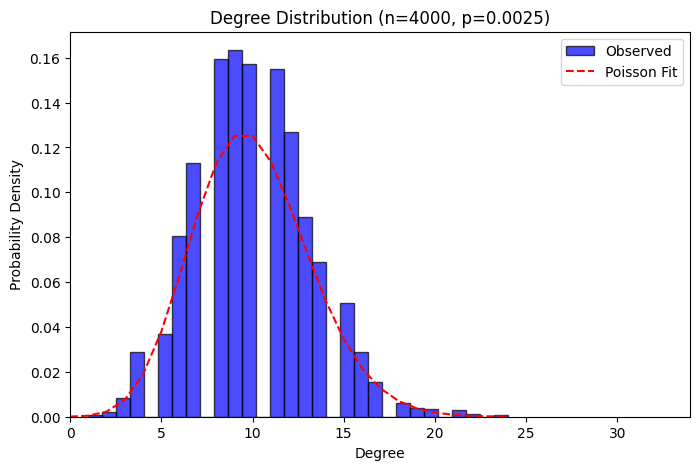

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson  

# Function to compute theoretical values for Erdős-Rényi network
def er_theoretical_values(n, p):
    avg_degree = p * (n - 1)
    avg_clustering = p
    avg_path_length = np.log(n) / np.log(avg_degree) if avg_degree > 1 else float('inf')
    return avg_degree, avg_clustering, avg_path_length

# Function to run experiment on Erdős-Rényi networks
def run_er_experiment(n, p, num_runs=30):
    avg_degree_list = []
    clustering_list = []
    path_length_list = []

    for _ in range(num_runs):
        G = nx.fast_gnp_random_graph(n, p)

        # Compute average degree
        degrees = [deg for _, deg in G.degree()]
        avg_deg = np.mean(degrees)
        avg_degree_list.append(avg_deg)

        # Compute average clustering coefficient
        avg_clust = nx.average_clustering(G)
        clustering_list.append(avg_clust)

        # Compute average path length (largest connected component)
        if nx.is_connected(G):
            avg_pl = nx.average_shortest_path_length(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_lcc = G.subgraph(largest_cc).copy()
            avg_pl = nx.average_shortest_path_length(G_lcc)
        path_length_list.append(avg_pl)

    return {
        "avg_degree": np.mean(avg_degree_list),
        "avg_clustering": np.mean(clustering_list),
        "avg_path_length": np.mean(path_length_list)
    }

# Function to plot histogram degree distribution with Poisson fit
def plot_degree_distribution(G, avg_degree, title="Degree Distribution"):
    degrees = [deg for _, deg in G.degree()]
    max_degree = max(degrees)

    plt.figure(figsize=(8, 5))
    
    # Histogram of degrees
    plt.hist(degrees, bins=30, color="blue", alpha=0.7, edgecolor="black", density=True, label="Observed")

    # Poisson distribution fit
    x_vals = np.arange(0, max_degree + 1)
    poisson_vals = poisson.pmf(x_vals, mu=avg_degree)
    plt.plot(x_vals, poisson_vals, 'r--', label="Poisson Fit")

    # Labels and title
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Probability Density")
    plt.legend()
    
    plt.xlim(0, max_degree + 10)  # Adjust x-axis to fit data
    plt.show()

# Configurations to test (changed values)
configs = [
    (1200, 0.008),  # Small network, moderate p
    (2500, 0.004),  # Mid-size
    (4000, 0.0025)  # Larger network
]

# Run simulations sequentially (No Multiprocessing)
for (n, p) in configs:
    print(f"\n==== Running config: n={n}, p={p} ====")

    # Run 30 trials and compute stats
    results = run_er_experiment(n, p, num_runs=30)

    # Print results
    avg_deg_th, avg_clust_th, avg_pl_th = er_theoretical_values(n, p)
    print(f"Estimated average degree: {results['avg_degree']:.4f} vs. theory ~ p*(n-1) = {avg_deg_th:.4f}")
    print(f"Estimated clustering:     {results['avg_clustering']:.4f} vs. theory ~ p = {p}")
    print(f"Estimated avg path len:   {results['avg_path_length']:.4f} vs. theory ~ log(n)/log(p*n): {math.log(n)/math.log(n*p):.4f}")

    # Generate one sample graph and plot degree distribution
    G_sample = nx.fast_gnp_random_graph(n, p)
    plot_degree_distribution(G_sample, avg_degree=results["avg_degree"], title=f"Degree Distribution (n={n}, p={p})")
